Assume, lower bound as -1 instead of 0.

y=0 if axb<0 else 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn as nn



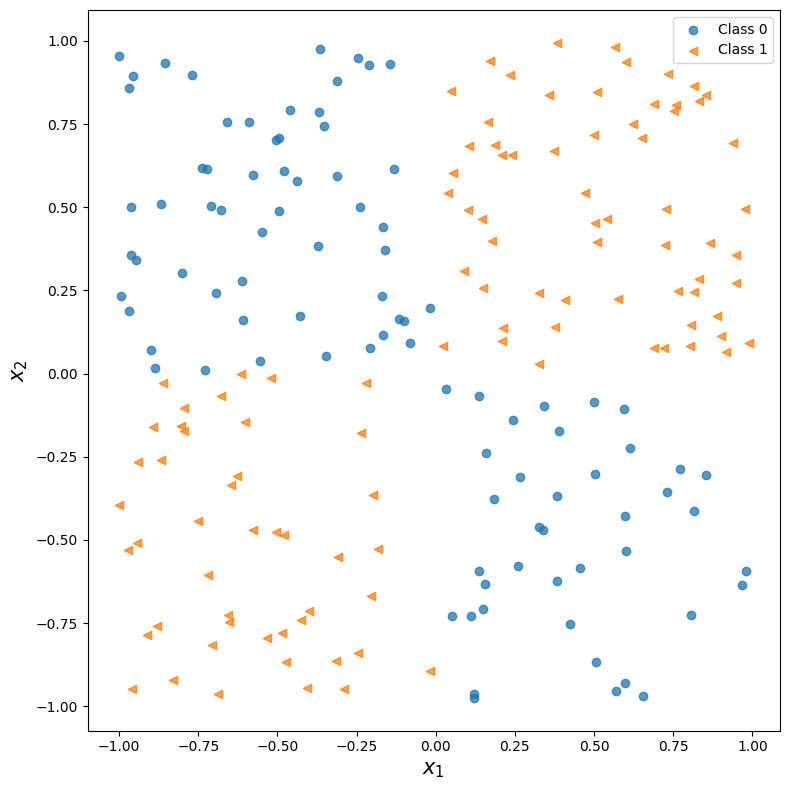

In [2]:
torch.manual_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200,2))
y = np.ones(len(x))
y[x[:, 0] * x[:,1]<0] = 0
n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:], dtype=torch.float32)
y_valid =  torch.tensor(y[n_train:], dtype=torch.float32)

fig = plt.figure(figsize=(8,8))
plt.scatter(x[y == 0, 0], x[y == 0, 1], marker='o', alpha=0.75,  label='Class 0')
plt.scatter(x[y == 1, 0], x[y == 1, 1], marker='<', alpha=0.75, label='Class 1')
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [3]:
# Neural Network design
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [4]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
batch_size=10


In [5]:
from torch.utils.data import DataLoader, TensorDataset
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
num_epochs = 100


In [6]:
# Train code 
def train(model, num_epochs, train_dl,x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:,0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()
        loss_hist_train[epoch] /= n_train
        accuracy_hist_train[epoch] /= n_train/batch_size
        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [7]:
history = train(model, num_epochs,train_dl, x_valid, y_valid)


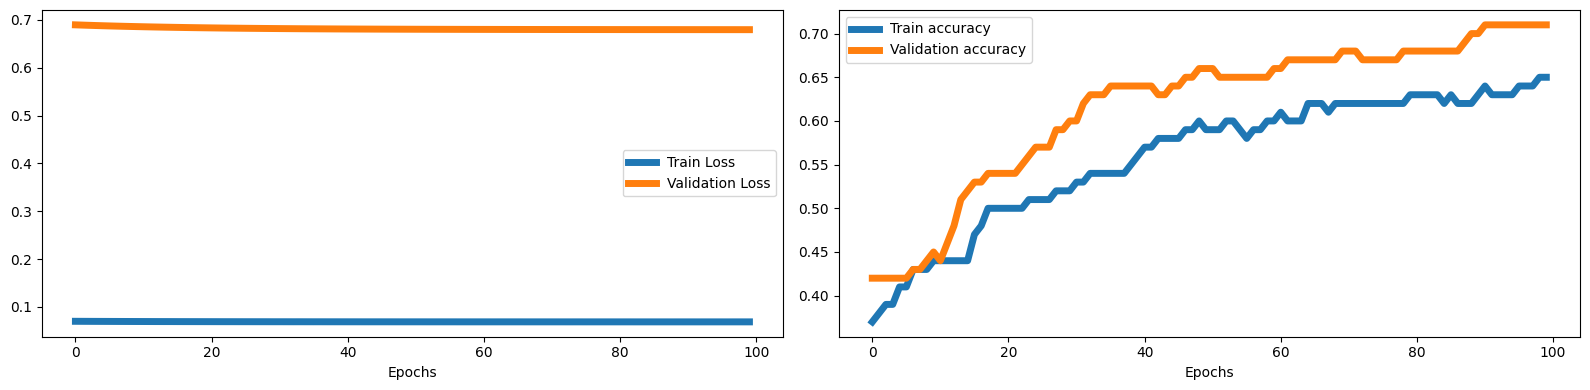

In [8]:
# plotting the training performance
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,2,1)
plt.plot(history[0], lw=5)
plt.plot(history[1], lw=5)
plt.legend(["Train Loss", "Validation Loss"], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax = fig.add_subplot(1,2,2)
plt.plot(history[2], lw=5)
plt.plot(history[3], lw=5)
plt.legend(["Train accuracy", "Validation accuracy"], fontsize=10)
ax.set_xlabel('Epochs', size=10)
plt.tight_layout()
plt.show()


In [9]:
# Constructing the model with more units and layers
model2 = nn.Sequential(
    nn.Linear(2,4),
    nn.ReLU(),
    nn.Linear(4,4),
    nn.ReLU(),
    nn.Linear(4,1),
    nn.Sigmoid()
)
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.01)
model2

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [10]:
history = train(model=model2, train_dl=train_dl,x_valid=x_valid,y_valid=y_valid, num_epochs=num_epochs)

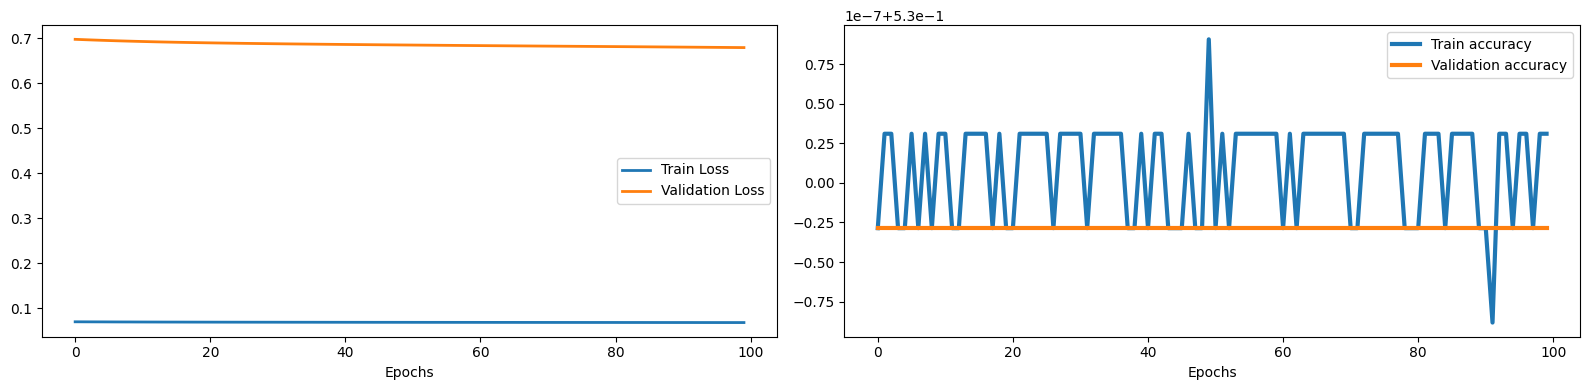

In [11]:
# plotting the training performance
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,2,1)
plt.plot(history[0], lw=2)
plt.plot(history[1], lw=2)
plt.legend(["Train Loss", "Validation Loss"], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax = fig.add_subplot(1,2,2)
plt.plot(history[2], lw=3)
plt.plot(history[3], lw=3)
plt.legend(["Train accuracy", "Validation accuracy"], fontsize=10)
ax.set_xlabel('Epochs', size=10)
plt.tight_layout()
plt.show()

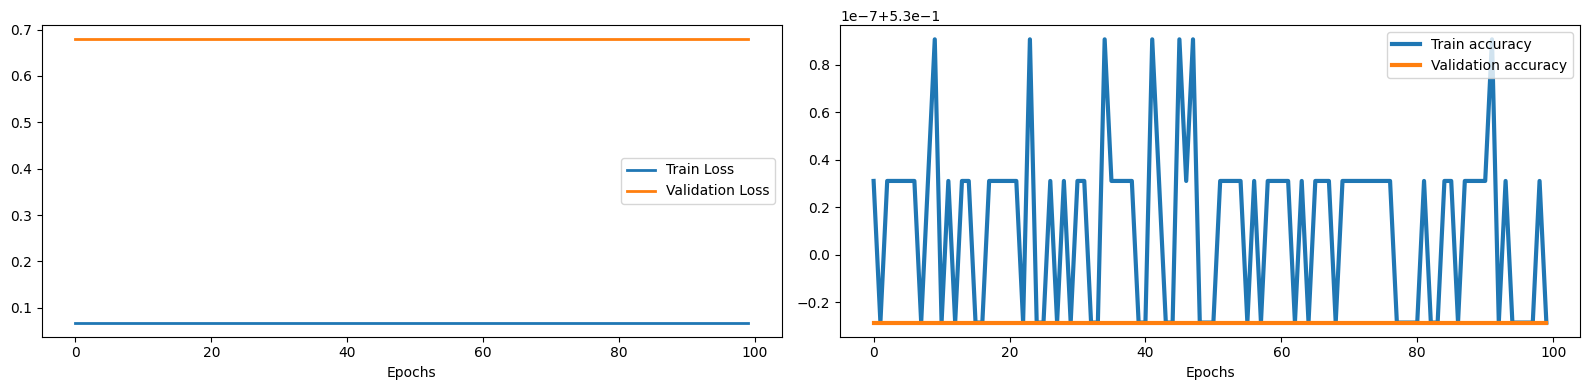

In [13]:
# Class based model design by nn.Module
from mlxtend.plotting import plot_decision_regions
class MyModule(nn.Module):
    def __init__(self) :
        super().__init__()
        l1 = nn.Linear(2,4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4,4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4,1)
        a3 = nn.Sigmoid() 

    def forward(self, x):
        x = self.l1(x)
        x = self.a1(x)
        x = self.l2(x)
        x = self.a2(x)
        x = self.l3(x)
        x = self.a3(x)
        return x
    
    def predict(self,x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred >= 0.5).float()
    


# plotting the training performance
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,3,1)
plt.plot(history[0], lw=2)
plt.plot(history[1], lw=2)
plt.legend(["Train Loss", "Validation Loss"], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax = fig.add_subplot(1,3,2)
plt.plot(history[2], lw=3)
plt.plot(history[3], lw=3)
plt.legend(["Train accuracy", "Validation accuracy"], fontsize=10)
ax.set_xlabel('Epochs', size=10)
ax = fig.add_subplot(1,3,3)
plt.tight_layout()
plt.show()